# Introduction to Python for Natural Language Processing

<sup>This notebook is a part of Natural Language Processing class at the University of Ljubljana, Faculty for computer and information science. Please contact [slavko.zitnik@fri.uni-lj.si](mailto:slavko.zitnik@fri.uni-lj.si) for any comments.</sub>

In [1]:
import sklearn
import nltk
import matplotlib

Let's download all the corpora from the NLTK library. Run the command below and then select appropriate options in a window that will open.

## Short introduction to Python

For more check the [official documentation](https://docs.python.org/3/) for Python 3.6, browse for online tutorials or just try to start coding.

### Basics

Let's first say hello:

In [2]:
print("Hello text!")

Hello text!


Now try some arithmetic operations:

In [3]:
1+1

2

In [4]:
a = 1 + 3
a

4

In [5]:
"5" * 5

'55555'

In [6]:
"5" + 5

TypeError: must be str, not int

Number operations.

In [7]:
5 / 2 - 1

1.5

In [8]:
number = 6/7
number

0.8571428571428571

In [9]:
round(number, 2)

0.86

In [10]:
"{:5.2}".format(number)

' 0.86'

In [11]:
f"{number:5.2}"

' 0.86'

### Strings

We will work with strings a lot. Remember that a string behaves similar to list as it is a list of characters.

In [12]:
# Now let's start to play with strings
willy = "William Shakespeare was an English poet, playwright, and actor" 
willy

'William Shakespeare was an English poet, playwright, and actor'

In [13]:
"The last word is: '" + willy[-5:] + "'"

"The last word is: 'actor'"

How could you print the first word only?

In [14]:
willy[0:7]

'William'

In [15]:
willy.find('poet') #finds position of substring within string

35

Character-level operations.

In [16]:
willy[0:7].upper() +' and '+ willy[8:19].lower() # turn to upper or lower case.

'WILLIAM and shakespeare'

In [17]:
willy[0:7].replace("li", "j") # replace a substring 'li' in the string with 'j'. 

'Wiljam'

Importing a string module.

In [18]:
import string

In [19]:
"?" in string.punctuation

True

What is a *string.punctuation*?

In [20]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


### Lists

In [21]:
list = [1,2,"3"]
list

[1, 2, '3']

Inline for loop.

In [22]:
multiplied = [item * 2 for item in list]
multiplied

[2, 4, '33']

For loop with a filter.

In [23]:
filtered = [item for item in list if int(item) < 3]
filtered

[1, 2]

Basic list operations.

In [24]:
words = willy.split(" ")
words

['William',
 'Shakespeare',
 'was',
 'an',
 'English',
 'poet,',
 'playwright,',
 'and',
 'actor']

In [25]:
len(words) # length of the list

9

Get the last word from the list:

In [26]:
words[len(words)-1]

'actor'

In [27]:
words.append(".")
words

['William',
 'Shakespeare',
 'was',
 'an',
 'English',
 'poet,',
 'playwright,',
 'and',
 'actor',
 '.']

In [28]:
sorted(words)

['.',
 'English',
 'Shakespeare',
 'William',
 'actor',
 'an',
 'and',
 'playwright,',
 'poet,',
 'was']

In [29]:
" ".join(words)

'William Shakespeare was an English poet, playwright, and actor .'

Why is comma together with the word but dot separated from the last word?

Standalone for loop.

In [30]:
for i, word in enumerate(words):
    if len(word) <= 3:
        print(f"Short word '{word:3}' is at index {i}.")

Short word 'was' is at index 2.
Short word 'an ' is at index 3.
Short word 'and' is at index 7.
Short word '.  ' is at index 9.


## Using the NLTK library

In this part we will show some basic operations on text using the NLTK library. First we need to import the needed libraries.

In [31]:
import nltk
import string

NLTK library features also its own repository of sources which you can download for some functions to work (e.g. tokenizer). It offers a function that downloads selected resources to you %HOME% folder.

In [32]:
# Function without parameters will open a UI where you can select and download resources
# nltk.download() 

# Otherwise, selected resources can be entered as a parameter to the function
# If you have not downloaded a resource, you get an error saying which one is missing
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /home/slavkoz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/slavkoz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

The function below will read a text file into string, do some operations on it and return a list of tokens. Why is better to use `nltk.word_tokenize()` method instead of `string.split()` method?

In [33]:
def getTokens():
   with open('shakespeare.txt', 'r') as shakes:
    text = shakes.read().lower()
    
    # remove punctuation
    table = text.maketrans({key: None for key in string.punctuation})
    text = text.translate(table)  
    
    tokens = nltk.word_tokenize(text)
    return tokens

We are first interested in number of times each word appears. For that we use `FreqDist` class.

In [34]:
from nltk import FreqDist

tokens = getTokens()
freq = FreqDist(tokens)
freq

FreqDist({'and': 63, 'the': 52, 'to': 36, 'i': 32, 'of': 28, 'that': 27, 'in': 27, 'my': 26, 'for': 22, 'be': 21, ...})

Keys of the dictionary are tokens and values are numbers of occurences of a key in the text. To get a list of tuples of type `(key, value)`, use `.items()` method.

In [35]:
freq.keys()

dict_keys(['this', 'young', 'gentlewoman', 'had', 'a', 'fathero', 'that', 'how', 'sad', 'passage', 'tiswhose', 'skill', 'was', 'almost', 'as', 'great', 'his', 'honesty', 'it', 'stretched', 'so', 'far', 'would', 'have', 'made', 'nature', 'immortal', 'and', 'death', 'should', 'play', 'for', 'lack', 'of', 'work', 'the', 'kings', 'sake', 'he', 'were', 'living', 'i', 'think', 'be', 'disease', 'excellent', 'indeed', 'madam', 'king', 'very', 'lately', 'spoke', 'him', 'admiringly', 'mourningly', 'skilful', 'enough', 'to', 'lived', 'still', 'if', 'knowledge', 'could', 'set', 'up', 'against', 'mortality', 'sole', 'child', 'my', 'lord', 'bequeathed', 'overlooking', 'those', 'hopes', 'her', 'good', 'education', 'promises', 'dispositions', 'she', 'inherits', 'which', 'makes', 'fair', 'gifts', 'fairer', 'where', 'an', 'unclean', 'mind', 'carries', 'virtuous', 'qualities', 'there', 'commendations', 'go', 'with', 'pity', 'they', 'are', 'virtues', 'traitors', 'too', 'in', 'better', 'their', 'simpleness

Hapaxes sre tokens that appear once in the text, let's see the first 20:

In [36]:
freq.hapaxes()[:20]

['fathero',
 'sad',
 'passage',
 'tiswhose',
 'skill',
 'stretched',
 'far',
 'immortal',
 'play',
 'lack',
 'work',
 'disease',
 'madam',
 'king',
 'spoke',
 'admiringly',
 'mourningly',
 'skilful',
 'enough',
 'could']

In [37]:
sorted(freq.items(), key = lambda x: x[1], reverse = True)[:10]

[('and', 63),
 ('the', 52),
 ('to', 36),
 ('i', 32),
 ('of', 28),
 ('that', 27),
 ('in', 27),
 ('my', 26),
 ('for', 22),
 ('be', 21)]

The frequency of the most commonly used words in the text:

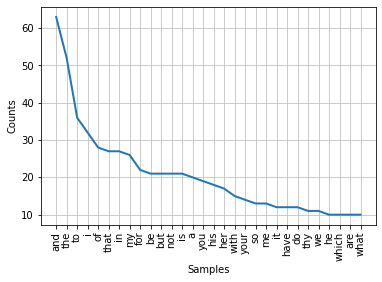

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [38]:
%matplotlib inline
freq.plot(30) # frequencies of top 30 commonly used words

Stopwords removal

In [39]:
from nltk.corpus import stopwords

stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Update the method `getTokens` above to delete all the stopwords from the text. How many tokens are returned by the method after that? Do also the results of the above code change?

In [40]:
# TODO: get the number of tokens without stopwords

What is the longest word in the text?

In [41]:
# TODO: find the longest word from the text

## Importing your own text

Above, we have seen how to retrieve text from a local file. To retrieve text from the user input:

In [42]:
text = input("Enter some text to the terminal: ")

Enter some text to the terminal:  test


In [43]:
print("The text you entered: '{}'".format(text))

The text you entered: 'test'


Retrieving text from online sources:

In [44]:
import nltk
from urllib.request import urlopen

In [45]:
url = "http://shakespeare.mit.edu/hamlet/full.html"
html = urlopen(url).read() 
html[:600]

b'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN"\n "http://www.w3.org/TR/REC-html40/loose.dtd">\n <html>\n <head>\n <title>Hamlet: Entire Play\n </title>\n <meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1">\n <LINK rel="stylesheet" type="text/css" media="screen"\n       href="/shake.css">\n </HEAD>\n <body bgcolor="#ffffff" text="#000000">\n\n<table width="100%" bgcolor="#CCF6F6">\n<tr><td class="play" align="center">The Tragedy of Hamlet, Prince of Denmark\n<tr><td class="nav" align="center">\n      <a href="/Shakespeare">Shakespeare homepage</A> \n    | <A href="/hamlet/">'

As you might see above, a lot of html tags are around the text that we would like to process. To remove HTML (or find some specific data within a HTML documen), we use a [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) library ([documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)).

In [46]:
from bs4 import BeautifulSoup

In [47]:
soup = BeautifulSoup(html, 'html.parser')
text = soup.get_text()
text[:600]

"\n\n\nHamlet: Entire Play\n \n\n\n\n\n\nThe Tragedy of Hamlet, Prince of Denmark\n\nShakespeare homepage \n    | Hamlet \n    | Entire play\n\nACT I\nSCENE I. Elsinore. A platform before the castle.\n\nFRANCISCO at his post. Enter to him BERNARDO\n\nBERNARDO\n\nWho's there?\n\nFRANCISCO\n\nNay, answer me: stand, and unfold yourself.\n\nBERNARDO\n\nLong live the king!\n\nFRANCISCO\n\nBernardo?\n\nBERNARDO\n\nHe.\n\nFRANCISCO\n\nYou come most carefully upon your hour.\n\nBERNARDO\n\n'Tis now struck twelve; get thee to bed, Francisco.\n\nFRANCISCO\n\nFor this relief much thanks: 'tis bitter cold,\nAnd I am sick at heart.\n\nBERNARDO\n\nHave you had qu"

Is there a difference if you print the value of *text[:600]*?

In [48]:
# TODO: print the value of text[:600] and observe the difference to the output above

## Exercise

We now know about the basics of text processing with Python 3.6 and NLTK 3.0. To validate your proficiency, perform the following:

* Retrieve data from an online source (e.g.: books from [http://www.fullbooks.com](http://www.fullbooks.com), [http://www.readanybook.com](http://www.readanybook.com) or posts from [http://www.rtvslo.si/](http://www.rtvslo.si/)).
* Process the data and report on results. Use the techniques we mentioned above, check the tools' documentation for additional techniques and use your imagination ...